# 과제   
- 주어진 데이터의 공분산 계산
- 주어진 데이터의 상관계수 계산
- 각 특성별로 히스토그램 그리기
- 각 품정별로 특성(꽃 받침 길이, 꽃받침 너비, 꽃잎길이, 꽃잎너비)에 대한 상자 그림 그리기
- 각 품종별로 꽃받침길이와 꽃받침 너비의 관계를 산점도로 나타내고 색상으로 품종을 구분하기

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# sepal : 꽃받침         petal : 꽃잎

In [448]:
file = 'iris.csv'
data = pd.read_csv(file, encoding = 'cp949')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### 1) 주어진 데이터의 공분산 계산

In [449]:
s_l = data['sepal.length']
s_w = data['sepal.width']
p_l = data['petal.length']
p_w = data['petal.width']

# 1열과 2열의 공분산 계산   => 음의 상관관계가 있다.
result1 = np.cov(s_l, s_w, ddof = 0)
result1

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

In [450]:
# 3열과 4열의 공분산 계산   => 양의 상관관계가 있다.
result2 = np.cov(p_l, p_w, ddof = 0)
result2

array([[3.09550267, 1.286972  ],
       [1.286972  , 0.57713289]])

#### 2) 주어진 데이터의 상관계수 계산

In [451]:
# 1열과 2열의 상관계수 계산   => 음의 상관계수를 가짐
np.corrcoef(s_l, s_w)  

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [452]:
# 3열과 4열의 상관계수 계산   => 양의 상관계수를 가짐
np.corrcoef(p_l, p_w)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

#### 3) 각 특성별로 히스토그램 그리기

In [453]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [455]:
#형변환
data['variety'] = data['variety'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [456]:
def draw_graph(num, insult_data, word_xlabel, c):
    fig = plt.figure(figsize = (18,6))
    ax = fig.add_subplot(2,2,num)
    
    bin_count = 20
    range_count = 10
    ax.hist(insult_data, bins = bin_count, range = (0, range_count), color = c)
    
    #x,y 축 라벨 표시
    ax.set_xlabel(word_xlabel)
    ax.set_ylabel('number')
    
    #눈금 표시
    ax.set_xticks(np.linspace(0,range_count, bin_count + 1))
    ax.set_yticks(np.linspace(0, 80, 8+1))
    ax.grid()
    
    #타이틀 표시
    ax.set_title(f"{word_xlabel}의 히스토그램")
    plt.show()

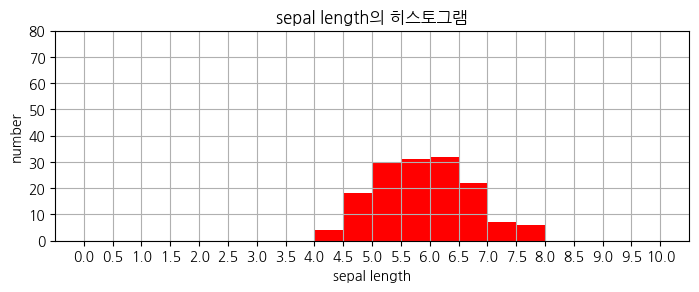

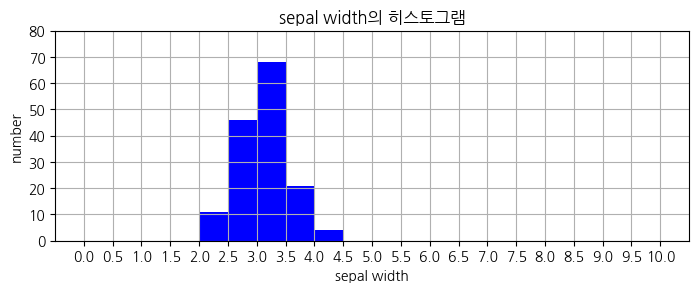

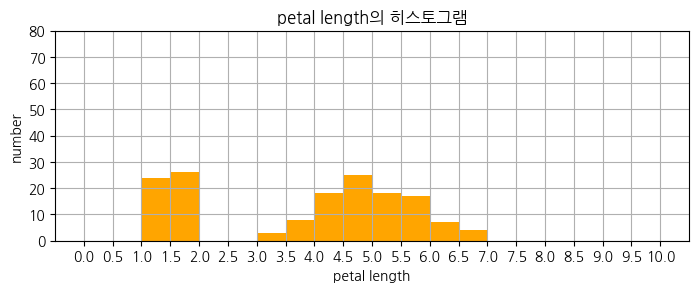

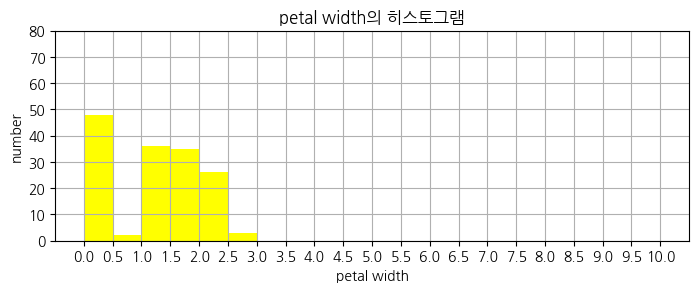

In [457]:
draw_graph(1, s_l, 'sepal length', 'red')
draw_graph(2, s_w, 'sepal width', 'blue')
draw_graph(3, p_l, 'petal length', 'orange')
draw_graph(4, p_w, 'petal width', 'yellow')

#### (4) 각 품종별로 특성(꽃 받침 길이, 꽃받침 너비, 꽃잎길이, 꽃잎너비)에 대한 상자 그림 그리기


In [458]:
data['variety'].value_counts() 

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [459]:
Sertosa = data.iloc[0:50]
Sertosa

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [460]:
def draw_box_old(num, insult_df, label_name):
    fig = plt.figure(figsize=(5, 10))
    #num = 1
    ax = fig.add_subplot(2, 2, num)  
    #insult_df = Sertosa['sepal.length']
    #label_name = 'Sertosa - sepal.length'
    ax.boxplot(insult_df, labels=[label_name])
    
    plt.show()
#     
# draw_box(1, Sertosa['sepal.length'], 'Sertosa - sepal.length')
# draw_box(2, Sertosa['sepal.width'], 'Sertosa - sepal.width')
# draw_box(3, Sertosa['petal.length'], 'Sertosa - petal.length')
# draw_box(4, Sertosa['petal.width'], 'Sertosa - petal.width')

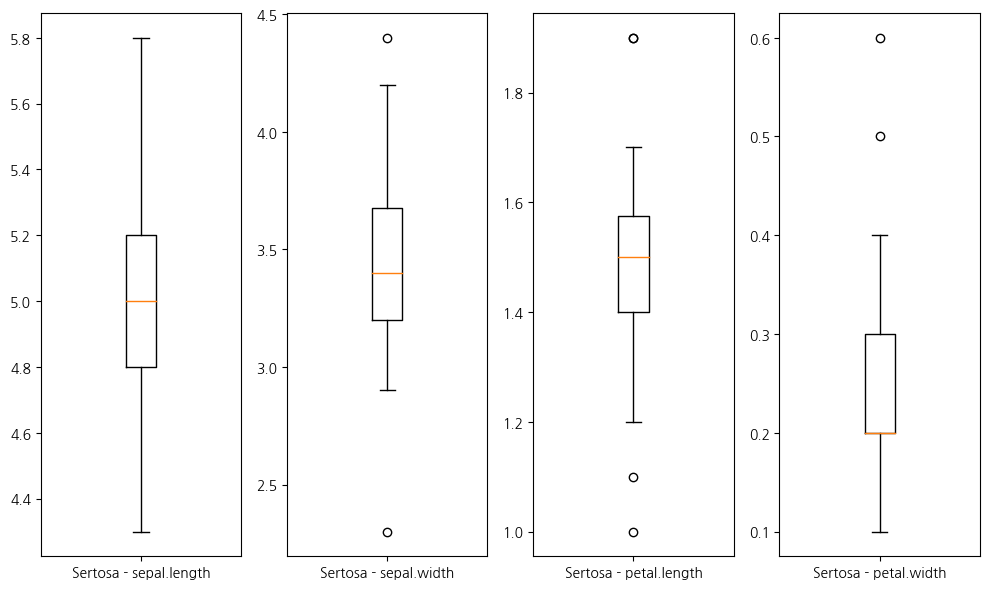

In [461]:
def draw_box(subp, insult_df, label_name):
    #num = 1
    ax = fig.add_subplot(subp)  
    #insult_df = Sertosa['sepal.length']
    #label_name = 'Sertosa - sepal.length'
    ax.boxplot(insult_df, labels=[label_name])
    
fig = plt.figure(figsize=(10, 6))
draw_box(141, Sertosa['sepal.length'], 'Sertosa - sepal.length')
draw_box(142, Sertosa['sepal.width'], 'Sertosa - sepal.width')
draw_box(143, Sertosa['petal.length'], 'Sertosa - petal.length')
draw_box(144, Sertosa['petal.width'], 'Sertosa - petal.width')
plt.tight_layout()
plt.show()

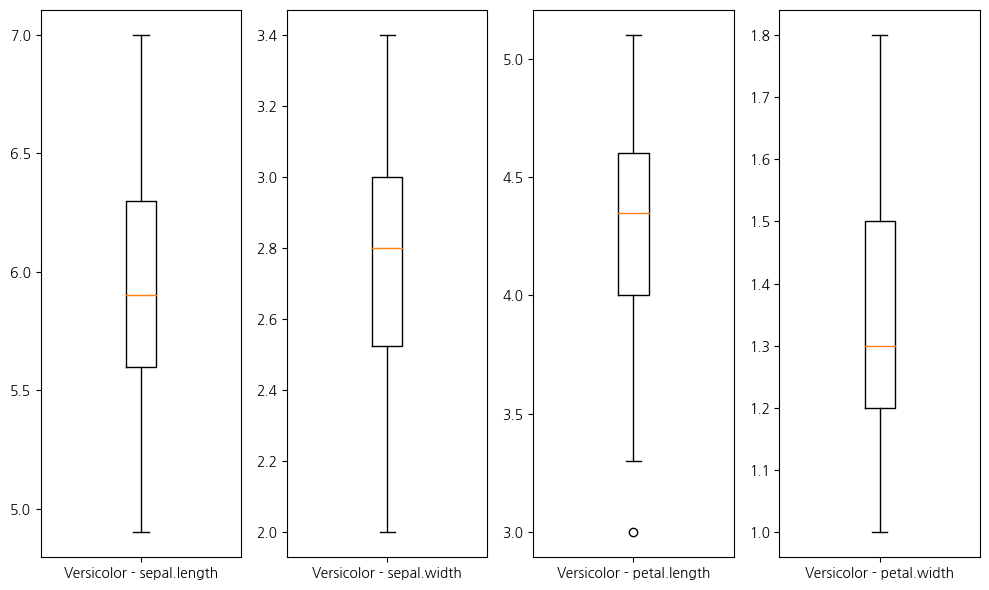

In [462]:
Versicolor = data.iloc[50:100]
Versicolor

fig = plt.figure(figsize=(10, 6))
draw_box(141, Versicolor['sepal.length'], 'Versicolor - sepal.length')
draw_box(142, Versicolor['sepal.width'], 'Versicolor - sepal.width')
draw_box(143, Versicolor['petal.length'], 'Versicolor - petal.length')
draw_box(144, Versicolor['petal.width'], 'Versicolor - petal.width')
plt.tight_layout()
plt.show()

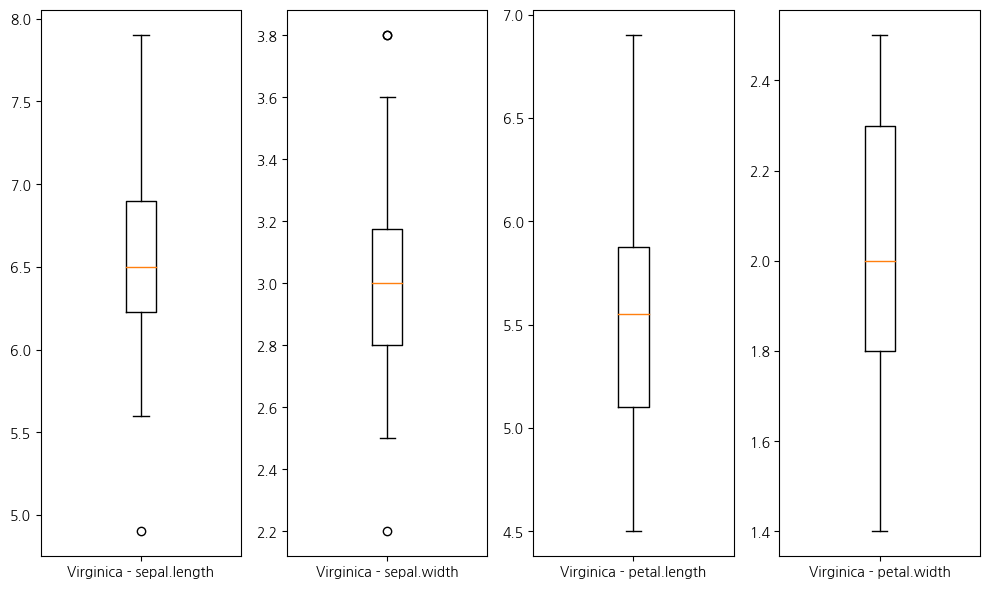

In [463]:
Virginica = data.iloc[100:]
Virginica

fig = plt.figure(figsize=(10, 6))
draw_box(141, Virginica['sepal.length'], 'Virginica - sepal.length')
draw_box(142, Virginica['sepal.width'], 'Virginica - sepal.width')
draw_box(143, Virginica['petal.length'], 'Virginica - petal.length')
draw_box(144, Virginica['petal.width'], 'Virginica - petal.width')
plt.tight_layout()
plt.show()

#### (5) 각 품종별로 꽃받침길이와 꽃받침 너비의 관계를 산점도로 나타내고 색상으로 품종을 구분하기

In [464]:
def draw_scatter(d, c, title_word):
    s_l_value = []
    s_w_value = []
    
    for i in range(d.shape[0]):
        value1 = d.iloc[i][0]
        s_l_value.append(value1)
        value2 = d.iloc[i][1]
        s_w_value.append(value2)
    
    plt.scatter(s_l_value, s_w_value, color = c)
    plt.title(f"[{title_word} Scatter]")
    plt.show()

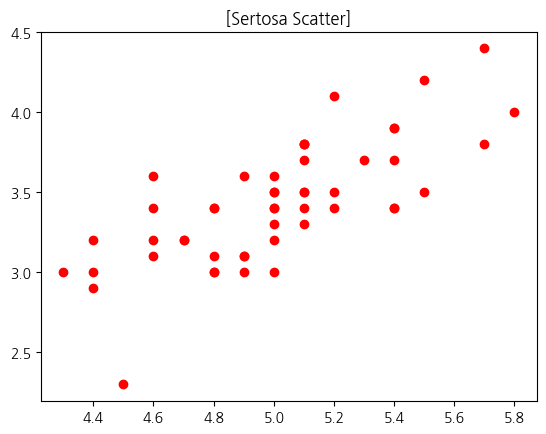

In [465]:
draw_scatter(Sertosa, 'red', 'Sertosa')

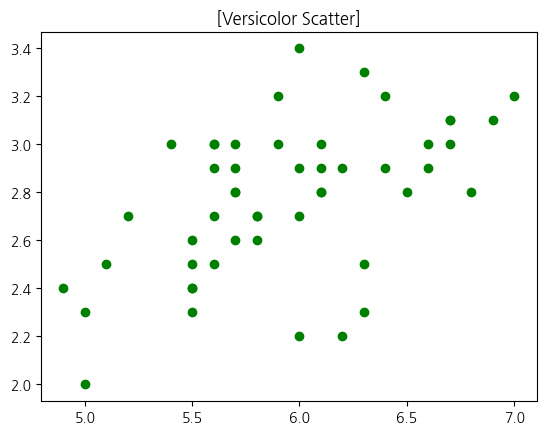

In [466]:
draw_scatter(Versicolor, 'green', 'Versicolor')

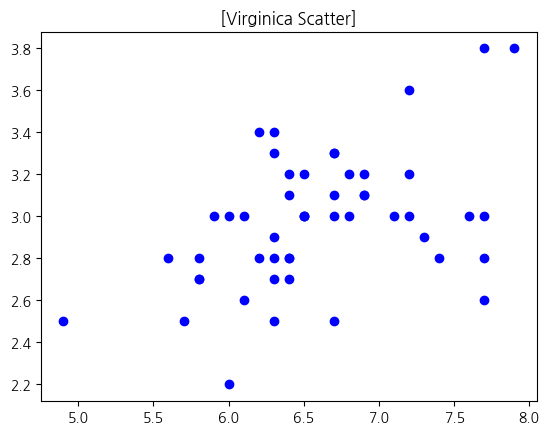

In [467]:
draw_scatter(Virginica, 'blue', 'Virginica')